In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data1 = pd.read_excel('fifa_data.xlsx')
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0


In [6]:
data1.describe()

,RAT,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,90.507463,90.228856,82.313433,86.114428,89.004975,68.323383,86.368159,181.711443,2306.452736,27.840796,29.276119
std,2.995195,6.088297,14.703614,6.045812,6.091385,19.643062,5.783060,7.031097,355.357002,4.024242,29.270590
min,85.000000,70.000000,33.000000,60.000000,70.000000,32.000000,70.000000,163.000000,691.000000,20.000000,1.000000
25%,89.000000,86.000000,78.000000,82.000000,87.000000,50.000000,82.000000,177.000000,2292.000000,25.000000,5.000000
50%,90.000000,91.000000,88.000000,87.000000,90.000000,70.000000,86.000000,181.000000,2389.000000,28.000000,20.000000
75%,92.000000,95.000000,92.000000,91.000000,93.000000,87.000000,90.000000,187.000000,2478.000000,30.000000,42.000000
max,98.000000,99.000000,99.000000,99.000000,99.000000,96.000000,99.000000,201.000000,2642.000000,38.000000,160.000000


In [7]:
data3 = data1.drop(['NAME', 'TEAM', 'NATION', 'POS'], axis = 1)
data3

,RAT,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
0,98,93,97,89,95,51,92,184,2498,33,60.0
1,98,95,99,90,95,43,90,187,2474,36,45.0
2,98,91,99,96,99,43,80,170,2477,34,80.0
3,97,99,94,92,97,50,92,178,2483,22,160.0
4,97,90,95,96,97,48,90,185,2491,33,25.0
...,...,...,...,...,...,...,...,...,...,...,...
196,85,85,84,80,88,50,86,188,891,34,1.2
197,85,91,88,81,87,35,79,177,2221,33,1.3
198,85,70,33,60,70,85,92,194,1887,30,4.0
199,85,88,80,79,89,35,80,198,691,23,14.0


In [8]:
X = data3.drop(['VALUE'], axis = 1)
y = data3.VALUE

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=0)

In [10]:
lr_model =LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

In [11]:
lr_model.score(X_train, y_train)

0.6684868538175468

In [12]:
mse = mean_squared_error(y_test, y_answer)
mse

320.69329908648217

In [13]:
r2 = r2_score(y_test, y_answer)
r2

0.5839741192118754

In [14]:
rmse = np.sqrt(mse)
rmse

17.9079116338696

In [15]:
lr_model.coef_

array([ 7.95324923, -1.1449074 ,  0.04832671,  0.25826378, -0.44443005,
       -0.07232604, -0.4103805 , -0.09816186, -0.00827851, -4.14975591])

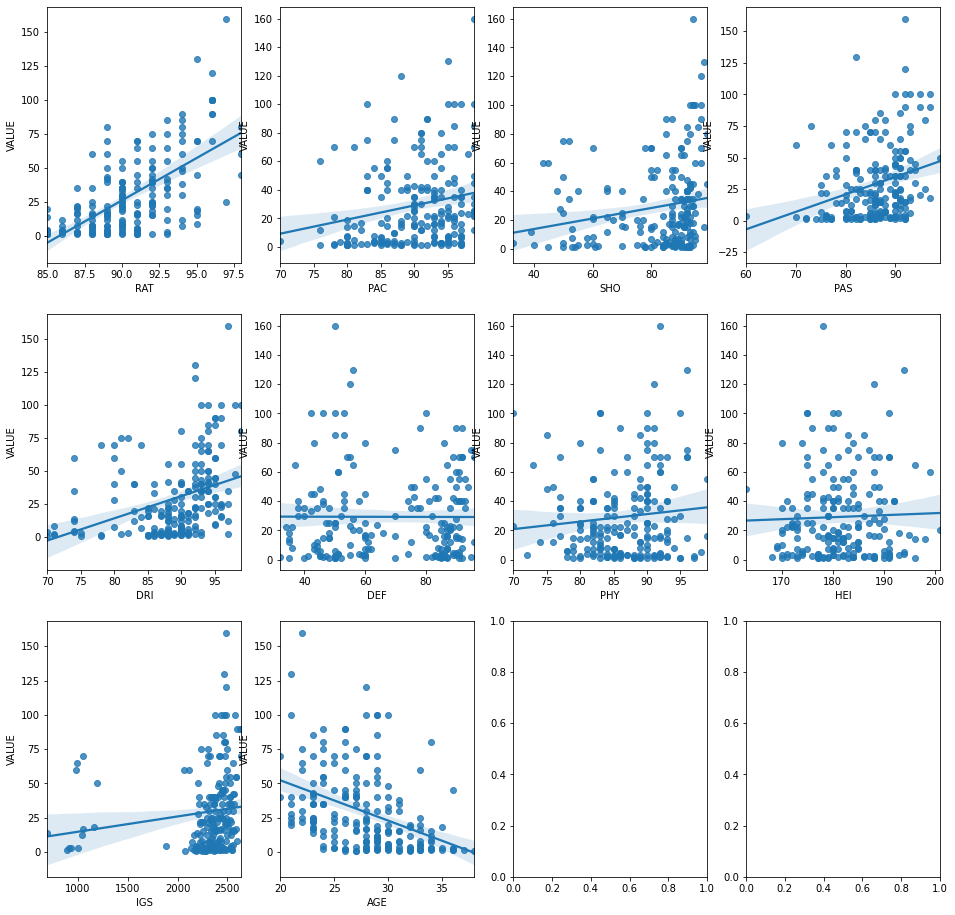

In [16]:

fig, ax = plt.subplots(figsize=(16,16), ncols=4, nrows=3)
for i, feature in enumerate(X):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y= data1.VALUE, data = data1 , ax=ax[row][col])

<AxesSubplot:>

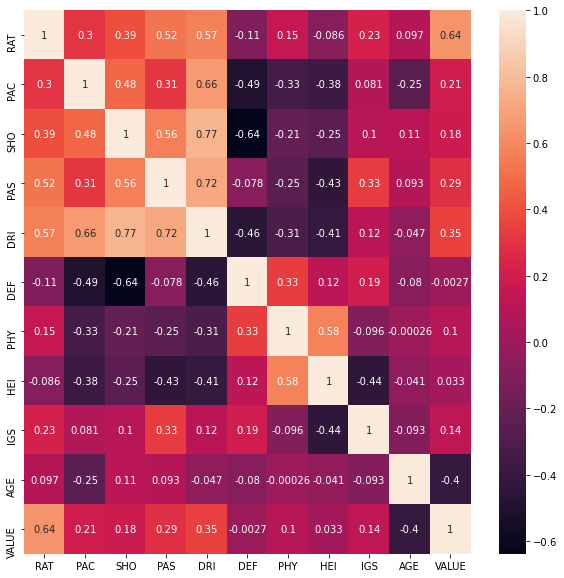

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True)

In [18]:
data1['NATION'].unique()

array(['Poland', 'Portugal', 'Argentina', 'France', 'Belgium', 'Egypt',
       'Brazil', 'England', 'Germany', 'Slovenia', 'Uruguay',
       'Netherlands', 'Norway', 'Korea, South', 'Italy', 'Spain',
       'Serbia', "Côte d'Ivoire ", 'Colombia', 'Mexico', 'Austria',
       'Burkina Faso', 'Sweden', 'Canada', 'Czech Republic', 'DR Congo',
       'Turkey', 'Croatia', 'Peru', 'Jamaica', 'Senegal', 'Cameroon',
       'Switzerland', 'Slovakia', 'Finland', 'Greece', 'Australia',
       'Zambia', 'Denmark', 'Morocco', 'Nigeria', 'United States',
       'Algeria', 'Bosnia-Herzegovina', 'Saudi Arabia', 'Ghana'],
      dtype=object)

In [27]:
nation_df = data1.groupby('NATION').mean()
nation_df.head()

,RAT,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
NATION,,,,,,,,,,,
Algeria,86.000000,91.000000,84.000000,90.000000,88.000000,35.000000,74.000000,182.000000,2222.000000,29.000000,12.000000
Argentina,90.928571,89.571429,82.714286,88.214286,89.071429,68.642857,85.285714,175.428571,2404.571429,29.928571,24.007143
Australia,88.000000,95.000000,90.000000,82.000000,87.000000,52.000000,88.000000,179.000000,2412.000000,28.000000,1.300000
Austria,92.000000,87.500000,86.500000,91.500000,90.000000,88.500000,89.000000,179.000000,2576.500000,28.000000,48.500000
Belgium,93.428571,89.714286,92.571429,89.142857,92.428571,63.142857,88.000000,184.428571,2269.428571,29.285714,52.714286


In [24]:
#< 가설 설정>

#1. 선수 가치는 Rating, 스탯에 비례하고 Age에 반비례할 것이다.
#2. (5대륙 기준) 남미, 유럽, 아프리카 선수들은 몸값이 높을 것이다.
#3. 빅클럽에 속하는 선수는 선수가치가 높을 것이다.
#4. 상위에 있는 포지션이나 연봉이 많이 받는 쪽은 스트라이커일 것이다.
#5. 30세를 초과하게 되면 선수 가치가 떨어질 것이다.

In [25]:
# 인지도, 시즌기록 등...

<AxesSubplot:>

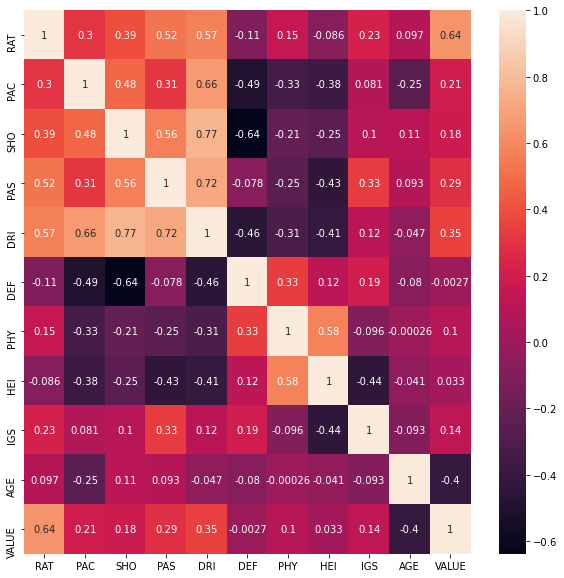

In [23]:
#1. 선수 가치는 Rating, 스탯에 비례하고 Age에 반비례할 것이다.
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True)

In [ ]:
#2. (5대륙 기준) 남미, 유럽, 아프리카 선수들은 몸값이 높을 것이다.

In [ ]:
data1

In [ ]:
data1['TEAM'].unique()

In [ ]:
  
# club=  {'Bayern Munich', 'Juventus FC', 'Paris Saint-Germain',
#                 'Real Madrid', 'Chelsea FC', 'Liverpool FC', 'Manchester United',
#                 'Manchester City', 'Tottenham Hotspur', 'Atlético de Madrid',
#                 'SSC Napoli', 'FC Barcelona', 'Borussia Dortmund','Inter Milan', 'SS Lazio', 'LOSC Lille',
#                 'Olympique Lyon', 'Atalanta BC', 'RB Leipzig','Bayer 04 Leverkusen','FC Porto','Sevilla FC',
#                  'Ajax Amsterdam':'big_club' ,
#                 'Leicester City','Eintracht Frankfurt','Orlando City SC','AS Monaco', 'AC Milan',
#                     'Qingdao FC', 'Sporting CP', 'Real Betis Balompié', 'Los Angeles FC', 'Real Sociedad',
#                     'Al-Shabab Riyadh', 'West Ham United', 'Daegu FC', 'Toronto FC',
#                     'VfB Stuttgart', 'Club de Gimnasia y Esgrima La Plata',
#                     'AZ Alkmaar', 'Fatih Karagümrük', 'Beijing Guoan','Shandong Taishan', 'Aston Villa',
#                     'Inter Miami CF', 'Shanghai Port', 'SL Benfoopoica','Al-Ittihad Jeddah', 'GNK Dinamo Zagreb', 
#                     'Seattle Sounders FC', 'Villarreal CF', 'VfL Wolfsburg', 'Wuhan Three Towns',
#                     'Alanyaspor', 'RC Lens', 'Watford FC', 'Rangers FC',
#                     'Brentford FC', 'Fenerbahce SK', 'Al-Nassr FC', 'Al Fateh', 'PSV',
#                     'Seattle Sounders', 'Al-Hilal Riyadh', 'ESTAC Troyes',
#                     'Montpellier HSC', 'RCD Espanyol Barcelona', 'Philadelphia Union',
#                     'Norwich City', 'San Jose Earthquakes', 'Leeds United',
#                     'Besiktas JK', 'New York City FC', 'VVV-Venlo', 'US Sassuolo',
#                     'Peterborough United', 'Stoke City', 'Celtic FC',
#                     'Melbourne City FC', 'FC Midtjylland', 'Al-Hazem SC', 'Sivasspor',
#                     'Cangzhou Mighty Lions', 'Galatasaray A.S.', 'KRC Genk',
#                     'PSV Eindhoven', 'Everton FC', 'Trabzonspor', 'Legia Warszawa',
#                     'Nashville SC', 'Barnsley FC', 'Hebei FC', 'Vitesse Arnhem',
#                     'Al-Ain FC', 'Hull City', 'Yeni Malatyaspor', ' Columbus Crew':'others_club'}


In [24]:
  
big_club=  ['Bayern Munich', 'Juventus FC', 'Paris Saint-Germain',
                'Real Madrid', 'Chelsea FC', 'Liverpool FC', 'Manchester United',
                'Manchester City', 'Tottenham Hotspur', 'Atlético de Madrid',
                'SSC Napoli', 'FC Barcelona', 'Borussia Dortmund','Inter Milan', 'SS Lazio', 'LOSC Lille',
                'Olympique Lyon', 'Atalanta BC', 'RB Leipzig','Bayer 04 Leverkusen','FC Porto','Sevilla FC',
                 'Ajax Amsterdam']
#                 'Leicester City','Eintracht Frankfurt','Orlando City SC','AS Monaco', 'AC Milan',
#                     'Qingdao FC', 'Sporting CP', 'Real Betis Balompié', 'Los Angeles FC', 'Real Sociedad',
#                     'Al-Shabab Riyadh', 'West Ham United', 'Daegu FC', 'Toronto FC',
#                     'VfB Stuttgart', 'Club de Gimnasia y Esgrima La Plata',
#                     'AZ Alkmaar', 'Fatih Karagümrük', 'Beijing Guoan','Shandong Taishan', 'Aston Villa',
#                     'Inter Miami CF', 'Shanghai Port', 'SL Benfoopoica','Al-Ittihad Jeddah', 'GNK Dinamo Zagreb', 
#                     'Seattle Sounders FC', 'Villarreal CF', 'VfL Wolfsburg', 'Wuhan Three Towns',
#                     'Alanyaspor', 'RC Lens', 'Watford FC', 'Rangers FC',
#                     'Brentford FC', 'Fenerbahce SK', 'Al-Nassr FC', 'Al Fateh', 'PSV',
#                     'Seattle Sounders', 'Al-Hilal Riyadh', 'ESTAC Troyes',
#                     'Montpellier HSC', 'RCD Espanyol Barcelona', 'Philadelphia Union',
#                     'Norwich City', 'San Jose Earthquakes', 'Leeds United',
#                     'Besiktas JK', 'New York City FC', 'VVV-Venlo', 'US Sassuolo',
#                     'Peterborough United', 'Stoke City', 'Celtic FC',
#                     'Melbourne City FC', 'FC Midtjylland', 'Al-Hazem SC', 'Sivasspor',
#                     'Cangzhou Mighty Lions', 'Galatasaray A.S.', 'KRC Genk',
#                     'PSV Eindhoven', 'Everton FC', 'Trabzonspor', 'Legia Warszawa',
#                     'Nashville SC', 'Barnsley FC', 'Hebei FC', 'Vitesse Arnhem',
#                     'Al-Ain FC', 'Hull City', 'Yeni Malatyaspor', ' Columbus Crew':'others_club'}


In [25]:
def big_to_categorical(x):
    if x in big_club:
        return 'big'
    else:
        return 'others'

In [50]:
data1['big_others_club'] = data1['TEAM'].apply(big_to_categorical)
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE,big_others_club,continent
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0,big,europe
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0,big,europe
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0,big,south_america
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0,big,europe
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0,big,europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2,others,south_america
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3,others,middle_east
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0,others,africa
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0,others,middle_east


In [51]:
data1['big_others_club'].value_counts()

others    109
big        92
Name: big_others_club, dtype: int64

In [28]:
club_mean = data1.groupby('big_others_club')['VALUE'].mean()

In [30]:
np.array(club_mean)

array([48.47065217, 13.07522936])

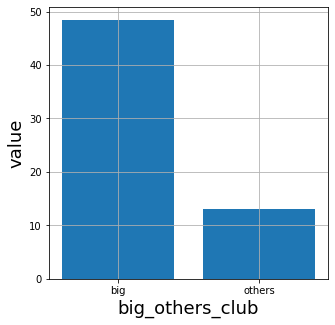

In [31]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.ylabel('value', fontsize=18)
plt.xlabel('big_others_club', fontsize=18)
plt.bar(['big', 'others'], np.array(club_mean))
plt.show()

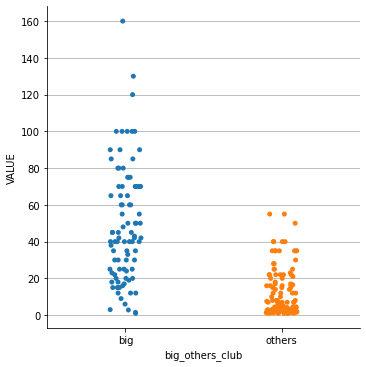

In [33]:
sns.catplot(data=data1, x = 'big_others_club', y = 'VALUE')

In [ ]:
#2. (5대륙 기준) 남미, 유럽, 아프리카 선수들은 몸값이 높을 것이다.

In [34]:
fifa_nation_africa = ["Egypt", "Côte d'Ivoire", "Burkina Faso", "DR Congo", 
                                 "Senegal", "Cameroon", "Zambia", "Morocco", "Nigeria",
                                 "Algeria", "Ghana", "Jamaica"]

fifa_nation_europe = ["Poland", "Portugal", "France", "Belgium", "England", 
                      "Germany", "Slovenia", "Netherlands", "Norway", "Italy",
                      "Spain", "Serbia", "Austria", "Sweden", "Czech Republic",
                      "Croatia", "Switzerland", "Slovakia", "Finland", "Greece", 
                      "Denmark", "Bosnia-Herzegovina"]

fifa_nation_south_america = ["Argentina", "Brazil", "Uruguay", "Mexico", "Peru", "Colombia"]


fifa_nation_others = ["Korea, South", "Canada", "Australia", "United States", "Turkey", "Saudi Arabia "]

fifa_nation_asia = ["Korea, South"]

fifa_nation_north_america = ["Canada", "United States"]

fifa_nation_oceania = ["Australia"]

fifa_nation_middle_east = ["Turkey", "Saudi Arabia "]

In [35]:
def nation_to_categorical(x):
    if x in fifa_nation_africa:
        return 'africa'
    elif x in fifa_nation_europe:
        return 'europe'
    elif x in fifa_nation_south_america:
        return 'south_america'
    elif x in fifa_nation_asia:
        return 'asia'
    elif x in fifa_nation_north_america:
        return 'north_america'
    elif x in fifa_nation_oceania:
        return 'oceania'
    else:
        return 'middle_east'

In [37]:
data1['continent'] = data1['NATION'].apply(nation_to_categorical)
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE,big_others_club,continent
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0,big,europe
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0,big,europe
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0,big,south_america
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0,big,europe
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0,big,europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2,others,south_america
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3,others,middle_east
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0,others,africa
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0,others,middle_east


In [38]:
nation_mean = data1.groupby('continent')['VALUE'].mean()

In [39]:
np.array(nation_mean)

array([20.78666667, 85.        , 32.65877863, 11.4       , 36.75      ,
        1.3       , 23.97272727])

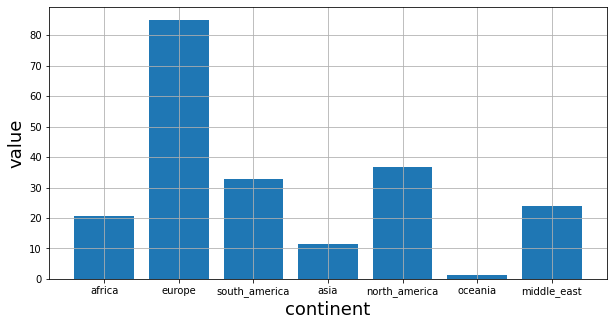

In [40]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.ylabel('value', fontsize=18)
plt.xlabel('continent', fontsize=18)
plt.bar(['africa', 'europe', 'south_america', 'asia', 'north_america', 'oceania', 'middle_east'], np.array(nation_mean))
plt.show()

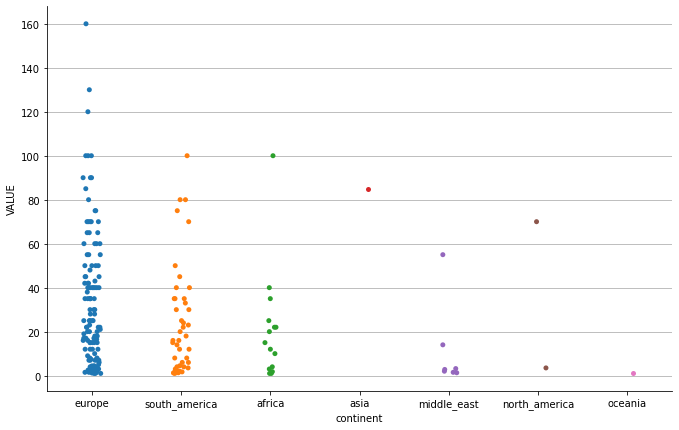

In [49]:
fig = sns.catplot(data=data1, x = 'continent', y = 'VALUE')
fig.fig.set_size_inches(10, 6) 

In [ ]:
#5. 종속변수의 분포를 살펴본다.

<AxesSubplot:>

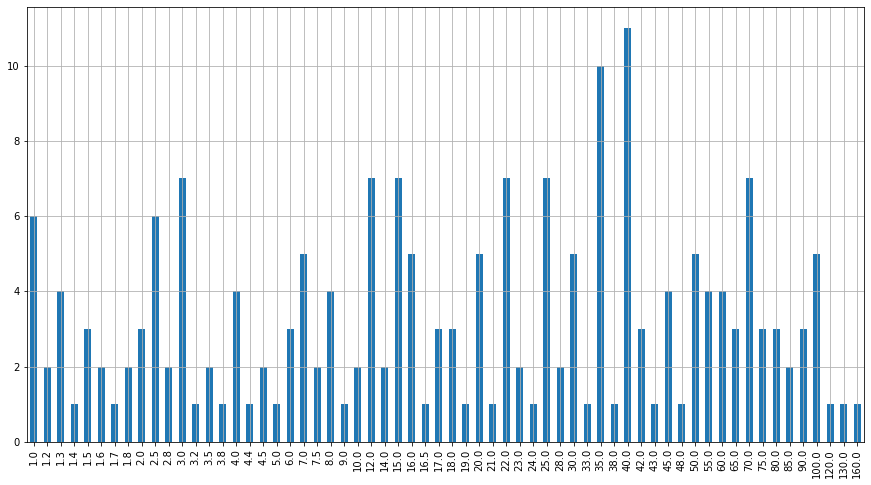

In [42]:
data1['VALUE'].value_counts().sort_index().plot(kind='bar', figsize=(15,8))

In [ ]:
a = data1['VALUE'].value_counts().sort_index()

In [ ]:
sns.jointplot(data =fifa_df , x = "AGE", y = "VALUE", kind = 'reg')

In [ ]:
sns.jointplot(data =fifa_df , x = "RAT", y = "VALUE", kind = 'reg')